# Clean me up please

In [1]:
# define a pytensor Op for our likelihood function
from pl_temp_fit import Exp_data_utils, fit_EL_exp_EMCEE

import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import os
os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 
#os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [2]:
# read csv data from folder
import importlib
import glob
csv_files = glob.glob('experiemental_data/blends/*.csv')
for id, file in enumerate(csv_files):
    print(id, file)


0 experiemental_data/blends/PM6Y61_1PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1EL.csv
3 experiemental_data/blends/PM6Y61_1_test_PL.csv


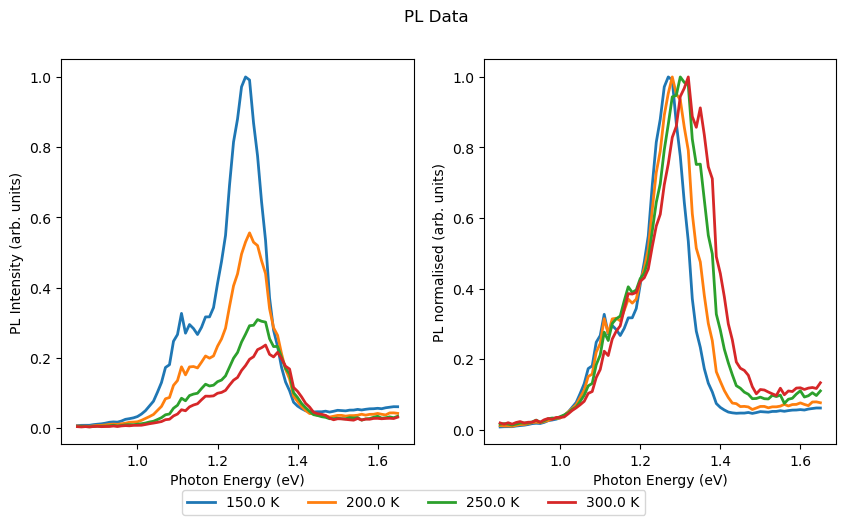

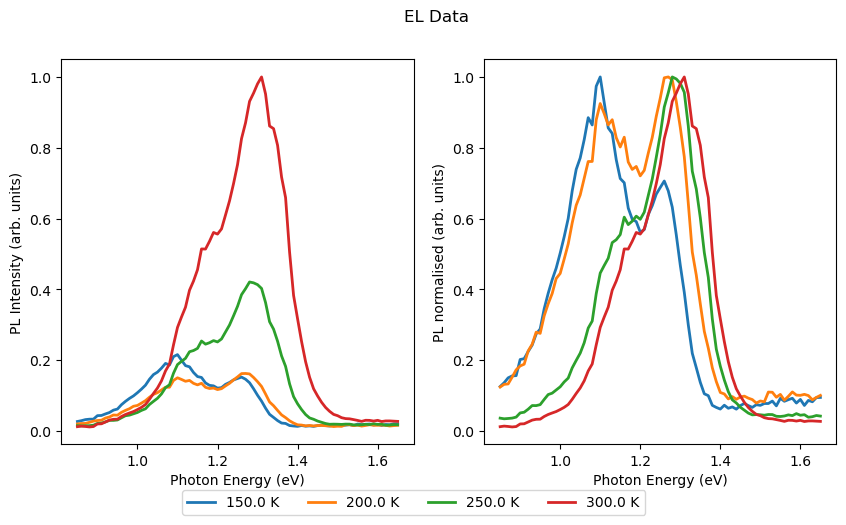

In [3]:
# plot EL and PL data
csv_name_PL=csv_files[3]#3 for y6, 18 for ITIC,12 for L8BO
csv_name_EL=csv_files[1]#3 for y6, 18 for ITIC,12 for L8BO
Exp_data_PL, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name_PL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_PL, temperature_list_PL, hws_PL,title="PL Data")
Exp_data_EL, temperature_list_EL, hws_EL = Exp_data_utils.read_data(csv_name_EL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_EL, temperature_list_EL, hws_EL,title="EL Data")

In [4]:
#initialise parameters for the model
import json
number_free_parameters , sigma, Temp_std_err, hws_std_err, relative_intensity_std_error_PL,relative_intensity_std_error_EL = 5, 0.001, 10, 0.005, 0.05,0.1

model_config = {
        "number_free_parameters": number_free_parameters,
        "sigma": sigma,
        "Temp_std_err": Temp_std_err,
        "hws_std_err": hws_std_err,
        "relative_intensity_std_error_PL": relative_intensity_std_error_PL,
        "relative_intensity_std_error_EL": relative_intensity_std_error_EL,
    }
X = {'temperature_list_PL':temperature_list_PL, 'hws_PL':hws_PL,
     'temperature_list_EL':temperature_list_EL, 'hws_EL':hws_EL}
print(f"size of hw is {hws_PL.shape}")
print(f"size of temperature_list is {temperature_list_PL.shape}")
date = datetime.datetime.now().strftime("%Y_%m_%d")
# generate the data
save_folder = (
    f"fit_experimental_emcee_EL/{date}/{csv_name_PL.split('/')[-1].split('.')[0]}/"
    + "test_sigma=" + str(sigma)
    + "temperature_list=" + str(len(temperature_list_PL))
    + "number_free_parameters=" + str(number_free_parameters)
    + "Temp_std_err="+str(Temp_std_err)
    + "hws_std_err="+str(hws_std_err)
)

os.makedirs(save_folder, exist_ok=True)
# save _model_config

# get initial covariance matrix
#get covariance matrix for the experimental data
init_params = [hws_PL[np.argmax(Exp_data_PL[:,0])], 0.02, 0.1, 0.1, 0.16]
model_config_save = model_config.copy()
model_config_save["init_params"] = init_params
with open(save_folder + "/model_config.json", "w") as f:
    json.dump(model_config_save, f)


size of hw is (81,)
size of temperature_list is (4,)


shape of mean value plot is (81, 4)
shape of mean value plot is (81, 4)


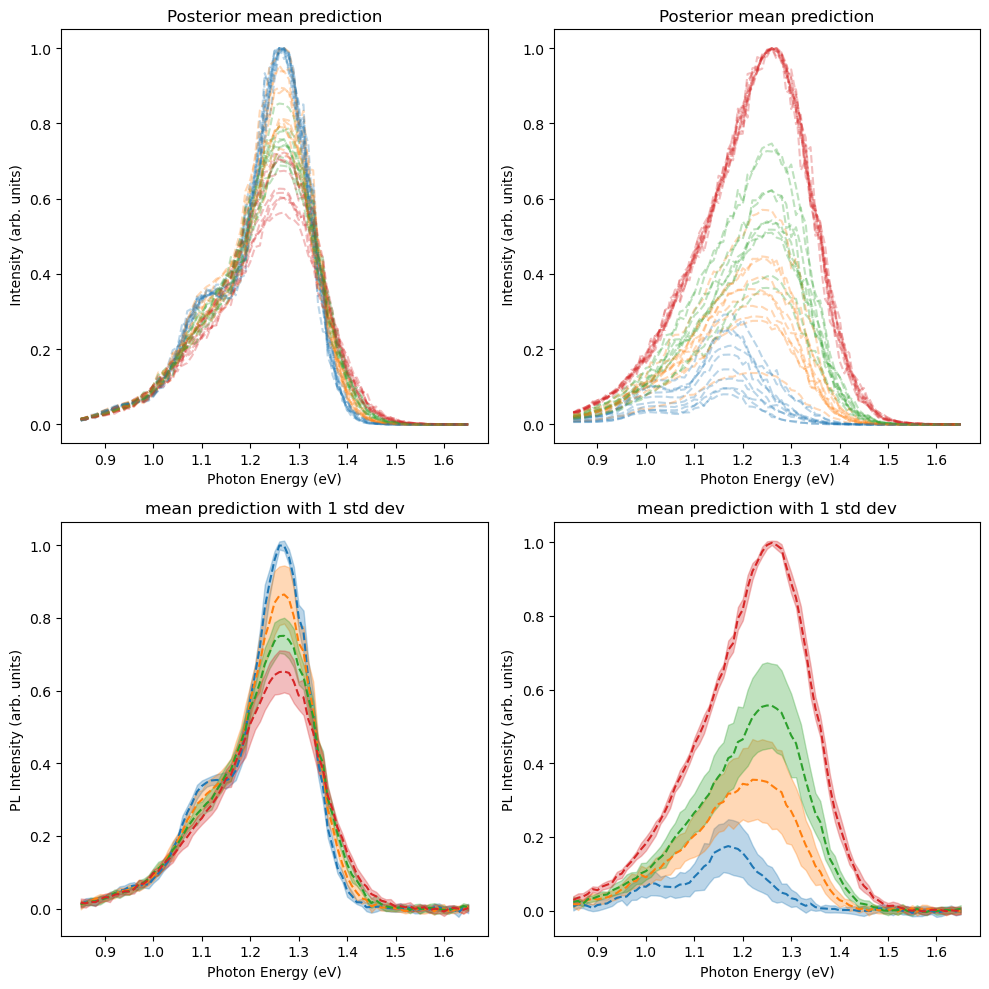

In [5]:
#get the variance of the data and plot it
LE_params = [1.37,1e-03,7.87e-02,1.1e-01, 1.59e-01]
init_params = [1.2, 10, 0.1, 0.1, 0.16,-2]
init_params = [hws_PL[np.argmax(Exp_data_PL[:,0])], 10, 0.1, 0.1, 0.16,-2]

co_var_mat_PL,co_var_mat_EL,variance_EL,variance_PL= fit_EL_exp_EMCEE.plot_generated_data(temperature_list_EL, hws_EL,temperature_list_PL,hws_PL, save_folder, model_config,LE_params, savefig=True,true_parameters=init_params)


In [6]:
importlib.reload(fit_EL_exp_EMCEE)
LE_params = [1.37159386e+00, 1.00000000e-03,7.87203363e-02,1.12738205e-01, 1.59916771e-01]
init_params = [1.2, 10, 0.1, 0.1, 0.16,-2]
soln = fit_EL_exp_EMCEE.get_maximum_likelihood_estimate( Exp_data_EL,Exp_data_PL, co_var_mat_PL,co_var_mat_EL ,X,save_folder,LE_params,init_params)


running the minimisation
step 0


/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/PL_Events.py:61: RuntimeWarning: overflow encountered in exp
  EX0 = CT0 * np.exp(-(EX.E-CT.E)/C.kb*D.T) / D.RCTE
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/PL_Events.py:33: RuntimeWarning: invalid value encountered in multiply
  D.kr_hw = EX.kr_hw * EX.Sum + CT.kr_hw * CT.Sum
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/fit_EL_exp_EMCEE.py:291: RuntimeWarning: invalid value encountered in divide
  model_data_EL = model_data_EL/np.max(model_data_EL.reshape(-1, 1))
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/fit_EL_exp_EMCEE.py:295: RuntimeWarning: invalid value encountered in divide
  model_data_PL = model_data_PL/np.max(model_data_PL.reshape(-1, 1))
/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


step 1
NORM_OF_PROJECTED_GRADIENT_
step 2
step 3
step 4
[ 1.24195019  9.67955596  0.08499157  0.08066096  0.18912761 -2.03191347]
Maximum likelihood estimates:
  E_CT = 1.242
  K_EXCT = 9.680
  LI = 0.085
  L0 = 0.081
  H0 = 0.189
  fosc_ct = -2.032
Maximum log likelihood: 16977.546394530345


(<Figure size 2000x500 with 4 Axes>,
 array([<Axes: title={'center': 'temperature=150.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=200.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=250.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=300.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>],
       dtype=object))

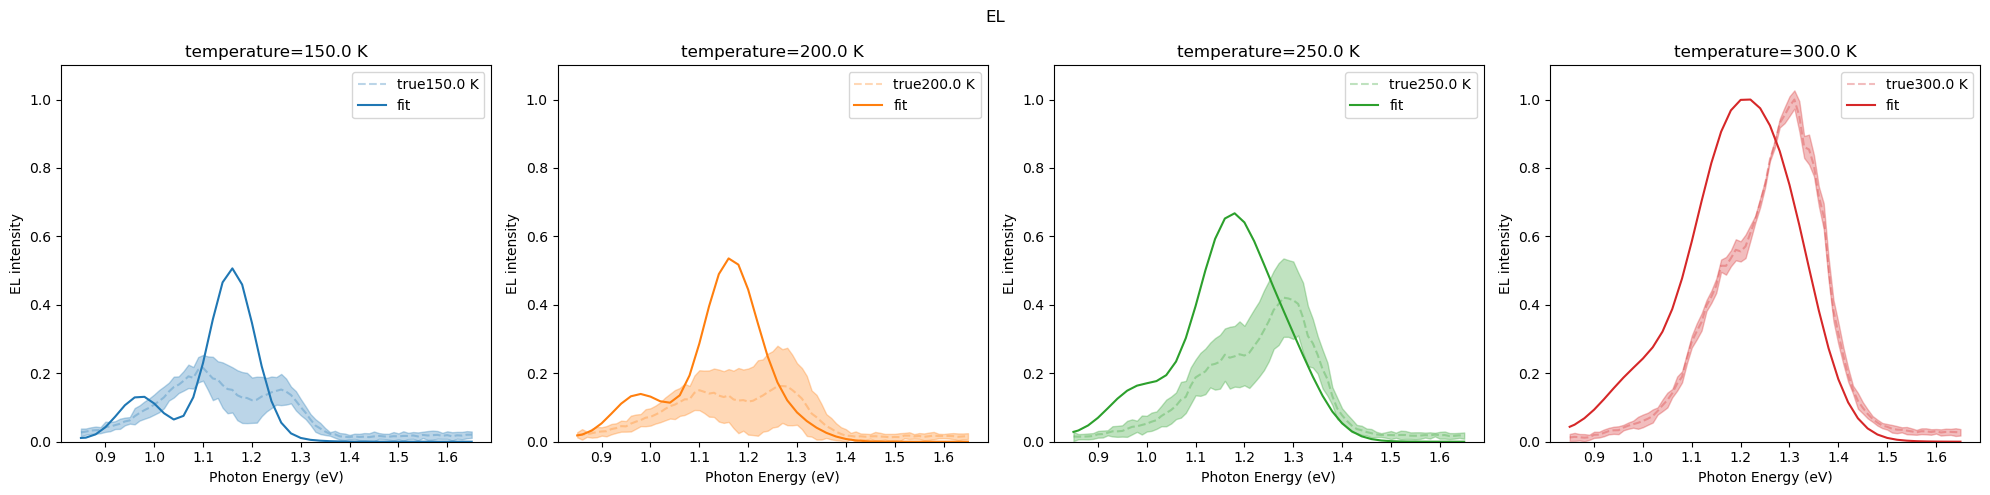

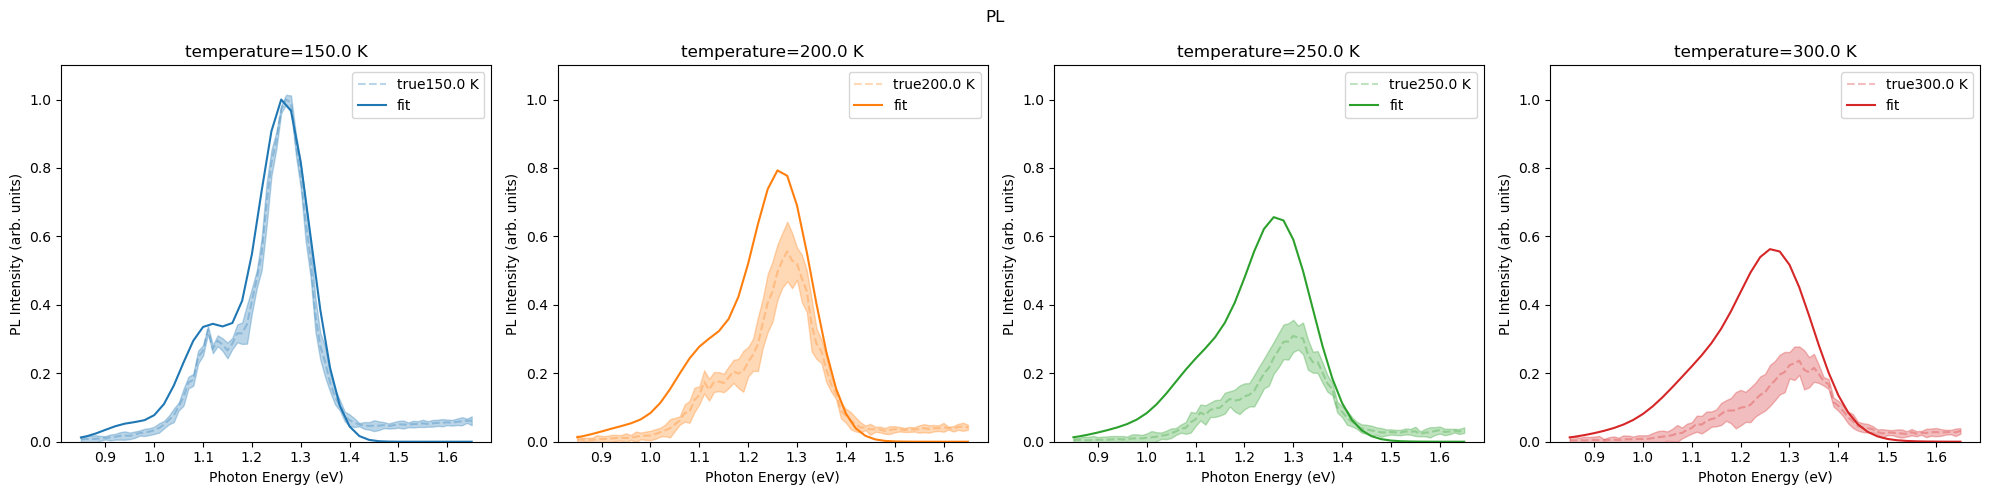

In [9]:
def plot_exp_data_with_variance(true_parameters,temperature_list_EL,hws_EL,temperature_list_PL,hws_PL,LE_params,variance_EL,variance_PL,save_folder):
    model_data_EL, model_data_PL= fit_EL_exp_EMCEE.el_trial(list(true_parameters), temperature_list_EL, hws_EL,temperature_list_PL,hws_PL,LE_params)
    truemodel_pl = model_data_PL/np.max(model_data_PL.reshape(-1,1))
    truemodel_el = model_data_EL/np.max(model_data_EL.reshape(-1,1))
    fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_EL, temperature_list_EL, hws_EL, variance_EL, save_folder)

    for i,axes  in enumerate(axis): 
        axes.plot(hws_EL,truemodel_el[:,i],label='fit',color="C" + str(i) )
        axes.legend()
        axes.set_ylim(0,1.1)
        axes.set_ylabel("EL intensity")
    fig.suptitle("EL")
    fig.tight_layout(h_pad=0.0)
    fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_PL, temperature_list_PL, hws_PL, variance_PL, save_folder)

    for i,axes  in enumerate(axis): 
        axes.plot(hws_PL,truemodel_pl[:,i],label='fit',color="C" + str(i) )
        axes.legend()
        axes.set_ylim(0,1.1)
    fig.suptitle("PL")
    fig.tight_layout(h_pad=0.0)
    return fig,axis
true_parameters = soln.x
plot_exp_data_with_variance(true_parameters,temperature_list_EL,hws_EL,temperature_list_PL,hws_PL,LE_params,variance_EL,variance_PL,save_folder)

In [28]:
np.inf > np.inf

False

In [45]:
import importlib
importlib.reload(fit_EL_exp_EMCEE)
import emcee
import time
def run_sampler_single(save_folder, soln, Exp_data_EL, Exp_data_PL,
                        co_var_mat_EL, co_var_mat_PL,LE_params, X,nsteps=10000,    coeff_spread = 10):

    coords = soln.x + [coeff_spread*1e-2,coeff_spread*1e-1,coeff_spread*1e-2,coeff_spread*1e-2,coeff_spread*1e-2,coeff_spread*1e-1] * np.random.randn(32, 6)   
    nwalkers, ndim = coords.shape
    # Set up the backend
    # Don't forget to clear it in case the file already exists
    filename = save_folder + "/sampler.h5"
    backend = fit_EL_exp_EMCEE.hDFBackend_2(filename, name="single_core")
    #backend.reset(nwalkers, ndim)
    try:
        print("Initial size: {0}".format(backend.iteration))
        
    except:
        print("backend doesn't exist")
        backend.reset(nwalkers, ndim)
        print("Initial size: {0}".format(backend.iteration))


    # We'll track how the average autocorrelation time estimate changes
    index = 0
    autocorr = np.empty(nsteps)
    # This will be useful to testing convergence
    old_tau = np.inf

    # Here are the important lines

    sampler = emcee.EnsembleSampler(nwalkers, ndim, fit_EL_exp_EMCEE.log_probability, args=( Exp_data_EL,Exp_data_PL, co_var_mat_EL,co_var_mat_PL, X,LE_params),backend=backend,moves=[
        (emcee.moves.DEMove(), 0.8),
        #(emcee.moves.DESnookerMove(), 0.2),
    ]) 
    start = time.time()
    # Now we'll sample for up to max_n steps
    for sample in sampler.sample(coords, iterations=nsteps, progress=True,blobs0=[]):
        # Only check convergence every 100 steps
        if sampler.iteration % 100:
            continue

        # Compute the autocorrelation time so far
        # Using tol=0 means that we'll always get an estimate even
        # if it isn't trustworthy
        try:
            tau = sampler.get_autocorr_time(tol=0)
            autocorr[index] = np.mean(tau)
            index += 1
            print(tau)
            # Check convergence
            converged = np.all(tau * 100 < sampler.iteration)
            converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
            if converged:
                break
            old_tau = tau
            end = time.time()
        except Exception as e:
            print(e)
            print("error in the autocorrelation time")                                                           
    #sampler.sample(pos, iterations = nsteps, progress=True,store=True)
    end = time.time()
    multi_time = end - start
    print("single process took {0:.1f} seconds".format(multi_time))
    #print("{0:.1f} times faster than serial".format(serial_time / multi_time))
    return sampler
sampler = run_sampler_single(save_folder, soln, Exp_data_EL,Exp_data_PL, co_var_mat_EL,co_var_mat_PL,LE_params, X,nsteps=5,coeff_spread=1)
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["E", "Kdis", "LI", "L0", "H0","fosc"]
ndim = len(labels)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
#fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
fig.show()
flat_samples = sampler.get_log_prob(discard=0, thin=1, flat=True)
print(flat_samples.shape)
fig, axes = plt.subplots(1,2)
hist = axes[0].hist(flat_samples[flat_samples>-np.inf], 10, color="k", histtype="step")
axes[0].set_title("log likelihood")
axes[1].plot(flat_samples)
fig.tight_layout()

Initial size: 34


  0%|          | 0/5 [00:00<?, ?it/s]/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
 20%|██        | 1/5 [00:17<01:11, 17.94s/it]

In [44]:
np.inf - np.inf

nan

In [154]:
# import the data and plot them
import importlib
import glob
csv_files = glob.glob('experiemental_data/blends/*.csv')
for id, file in enumerate(csv_files):
    print(id, file)


0 experiemental_data/blends/PM6Y61_1PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1EL.csv
3 experiemental_data/blends/PM6Y61_1_test_PL.csv


In [155]:
csv_name_PL=csv_files[3]#3 for y6, 18 for ITIC,12 for L8BO
csv_name_EL=csv_files[1]#3 for y6, 18 for ITIC,12 for L8BO
results_name = csv_name_PL.replace('.csv','').split('/')[-1]
sh_name = f"Run_EMCEE_{results_name}.sh"
script="#!/bin/bash \n"+\
    "#PBS -l walltime=07:59:01 \n"+\
    "#PBS -l select=1:ncpus=32:mem=80gb:avx=true \n"+\
    " \n"+\
    "cd /rds/general/user/ma11115/home/pl_temp_fit/ \n"+\
    "module load anaconda3/personal \n"+ \
    "source activate pymc_env     \n"+\
    f"python src/pl_temp_fit/fit_EL_exp_EMCEE.py --test_number 2 --data_file_EL {csv_name_EL}  --data_file_PL {csv_name_PL} --coeff_spread 3 \n"#${'PBS_ARRAY_INDEX'}#f"#PBS -J 1-{16} \n"+\
#print(script) 
with open(f'HPC_bash_script/{sh_name}', 'wb') as f:
    f.write( bytes(script, 'utf-8'))  
script= f"qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}"#submit to HPC
!{script}

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


# analyse results

In [14]:
# analyse results
import importlib
import glob
csv_names = glob.glob('experiemental_data/*/*.csv')
list_params = []

for csv_name in csv_names:
    folder = glob.glob(f"fit_experimental_emcee_EL/*/{csv_name.replace('.csv','').split('/')[-1]}/*")
    for f in folder:
        name = f.split('/')[-1]
        if 'sampler.h5' in os.listdir(f):
            
            saver_folder = f
            params_dict = {}
            for x in name.split('_'):
                if '=' in x:
                    try:
                        params_dict[x.split('=')[0]]=int(x.split('=')[1])
                    except:
                        pass
                        #print(x)
            # put results into a dataframe
        # reload sampler from file
            try:
                filename = f + "/sampler.h5"

                reader = fit_EL_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
                distribution = reader.get_chain(discard=1, thin=5, flat=True)
                true_parameters=list(np.mean(distribution,axis=0))
                params_dict['mean'] = [f"{x:.3f}" for x in true_parameters]      
                params_dict['saved_folder'] = f        
                params_dict['num_iteration'] = reader.iteration  
                params_dict['exp_data'] = csv_name.split('/')[-1]   
                log_prob = reader.get_log_prob(discard=2, thin=1, flat=True)  
                params_dict['max_log_prob'] = np.max(log_prob)
                params_dict['csv_position'] = csv_names.index(csv_name)
                list_params.append(params_dict)                      
            except Exception as e:
                print('error')
                print(f)
                print(e)
                break

import pandas as pd
df = pd.DataFrame.from_records(list_params)
df


error
fit_experimental_emcee_EL/2024_02_22/PM6Y61_1_test_PL/test_sigma=0.001temperature_list=4number_free_parameters=5Temp_std_err=10hws_std_err=0.005
You must run the sampler with 'store == True' before accessing the results


,list,parms,err,spread,mean,saved_folder,num_iteration,exp_data,max_log_prob,csv_position
0,6.0,5.0,10.0,5.0,"[1.125, 10.138, 0.063, 0.121, 0.144, -2.186]",fit_experimental_emcee_EL/2024_02_22/Y6-15mgml...,15,Y6-15mgml-85Canneal.csv,-15842.863979,3
1,NaN,NaN,NaN,NaN,"[1.297, 9.186, 0.122, 0.035, 0.171, -2.417]",fit_experimental_emcee_EL/2024_02_21/PM6Y61_1P...,12847,PM6Y61_1PL.csv,-1577.195547,22
2,NaN,NaN,NaN,NaN,"[1.152, 8.534, 0.047, 0.036, 0.167, -2.286]",fit_experimental_emcee_EL/2024_02_20/PM6Y61_1P...,10,PM6Y61_1PL.csv,-8035.923377,22
3,NaN,NaN,NaN,NaN,[219562209099955199333422268054714456607793208...,fit_experimental_emcee_EL/2024_02_21/PM6Y61_1_...,2589,PM6Y61_1_test_PL.csv,-11732.385840,25
4,4.0,5.0,10.0,5.0,"[1.212, 8.599, 0.103, 0.120, 0.179, -3.627]",fit_experimental_emcee_EL/2024_02_22/PM6Y61_1_...,13410,PM6Y61_1_test_PL.csv,-1190.794024,25


In [45]:
#plot posterior predictive

model_config = {
        "number_free_parameters": 6,
        "sigma": 0.01,
        "Temp_std_err": 2,
        "hws_std_err": 0.005,
        "relative_intensity_std_error_PL": 0.01,
        "relative_intensity_std_error_EL": 0.01,
    }
save_folder = 0

In [15]:
#load data and plot the relevant histograms
index = 4
filename = df['saved_folder'][index] + "/sampler.h5"
csv_name = csv_names[df['csv_position'][index]]
print(filename)

fit_experimental_emcee_EL/2024_02_22/PM6Y61_1_test_PL/_sigma=0.001_temperature_list=4_numb_parms=5_Temp_std_err=10_hws_std_err=0.005_coeff_spread=5/sampler.h5


In [ ]:
flat_samples = reader.get_log_prob(discard=1000, thin=5, flat=True)
fig, axes = plt.subplots(1,2)
axes

In [25]:
min(flat_samples)

-inf

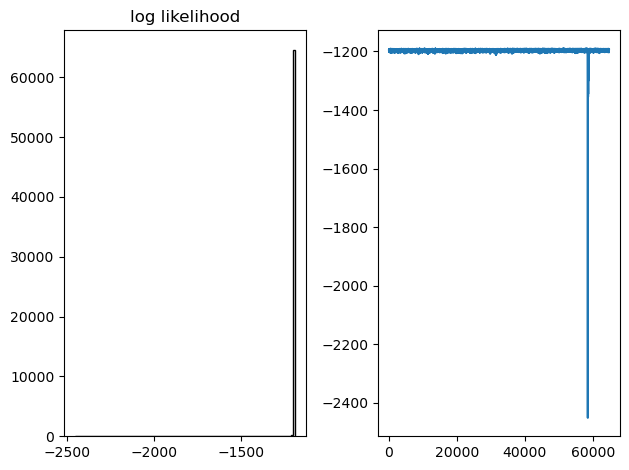

In [20]:
reader = fit_EL_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
flat_samples = reader.get_log_prob(discard=1000, thin=5, flat=True)
fig, axes = plt.subplots(1,2)
#flat_samples = flat_samples[flat_samples>-1.3e3]
flat_samples = flat_samples[flat_samples>-10e3]
hist = axes[0].hist(flat_samples, 100, color="k", histtype="step")
axes[0].set_title("log likelihood")
axes[1].plot(np.arange(len(flat_samples)),flat_samples)
#axes[1].set_ylim(-1e3,0)
#axes[0].set_xlim(-1e4,0)

fig.tight_layout()


Initial size: 13410
(429056,)


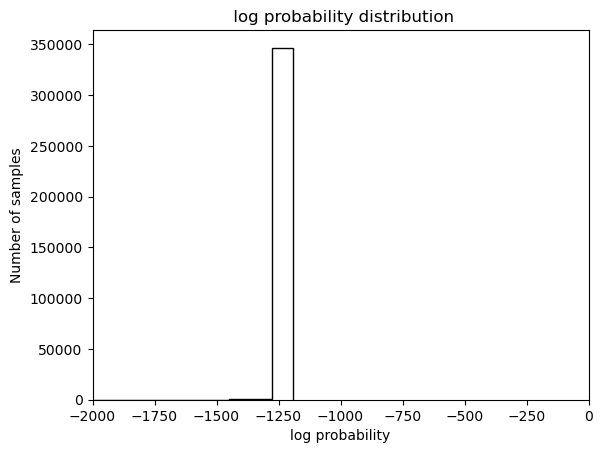

(429056,)
experiemental_data/blends/PM6Y61_1_test_PL.csv
 true parameter mean [1.2123763514941077, 8.578147188175377, 0.10407264379587403, 0.12187566961318118, 0.182748158294998, -3.6410903384343225]
shape of mean value plot is (81, 4)
shape of mean value plot is (81, 4)


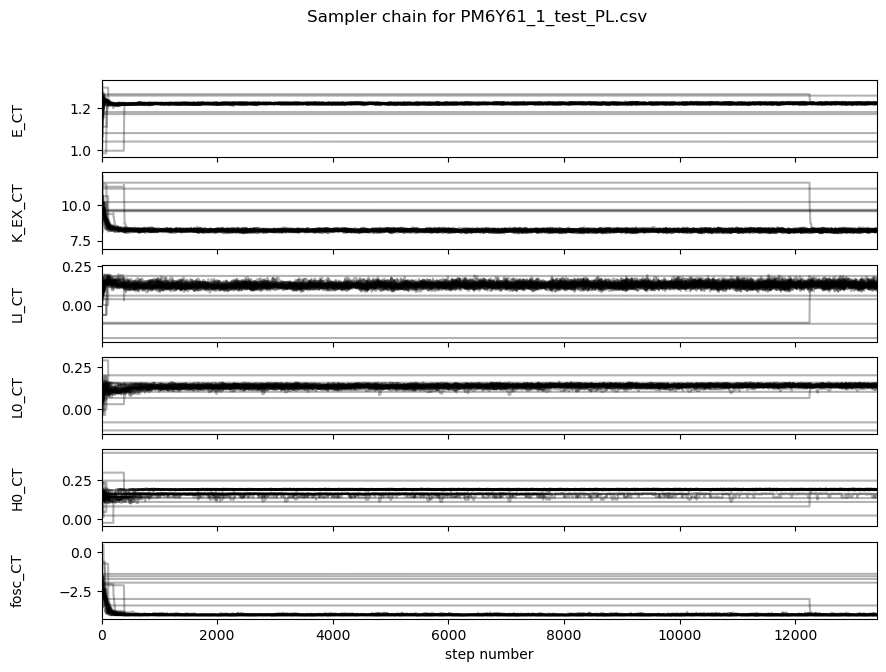

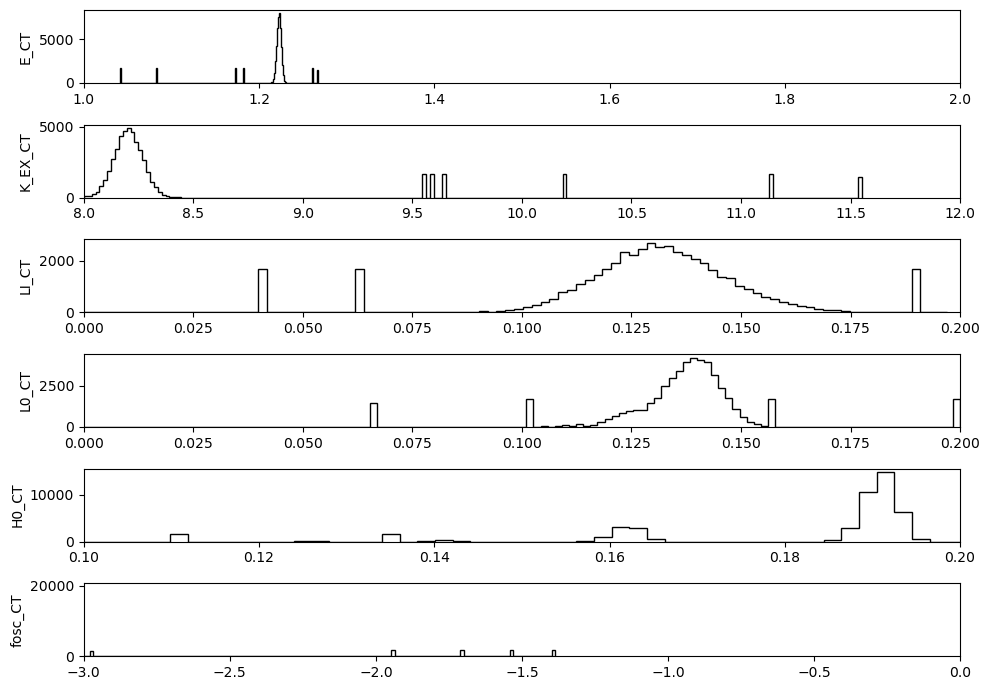

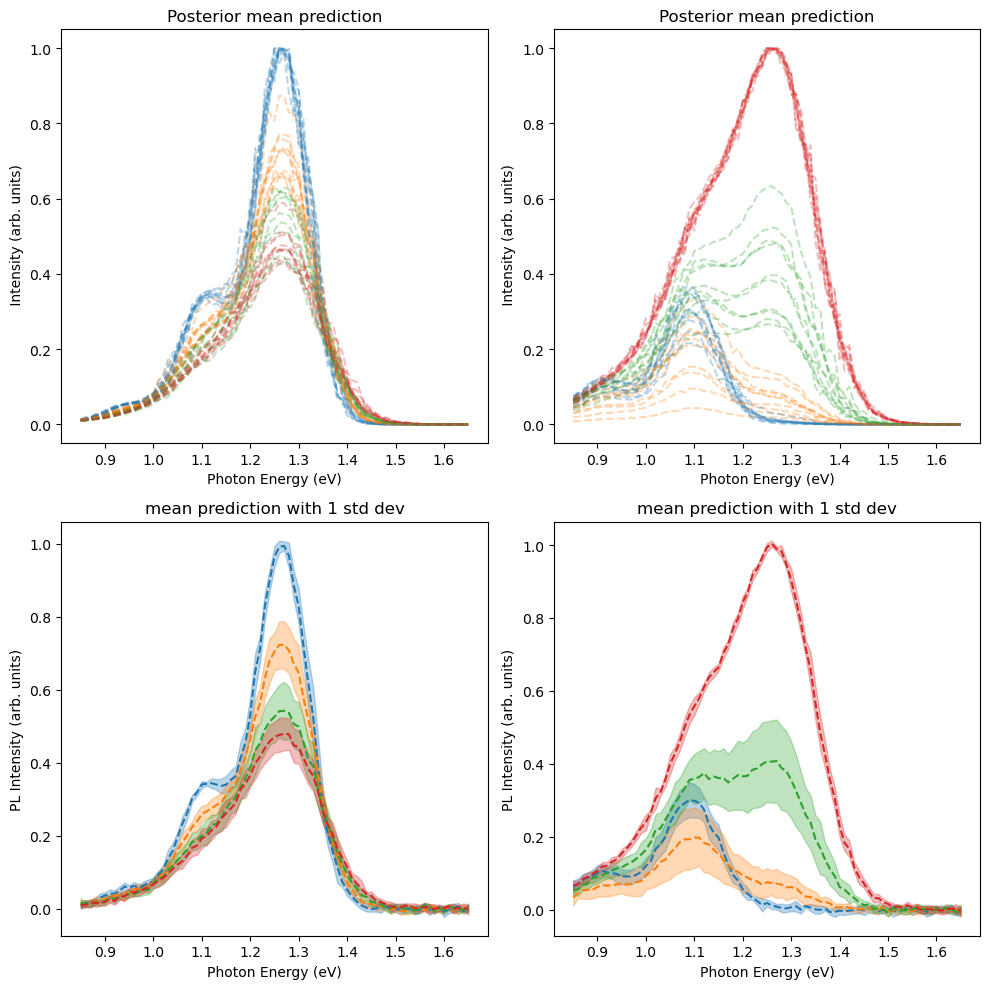

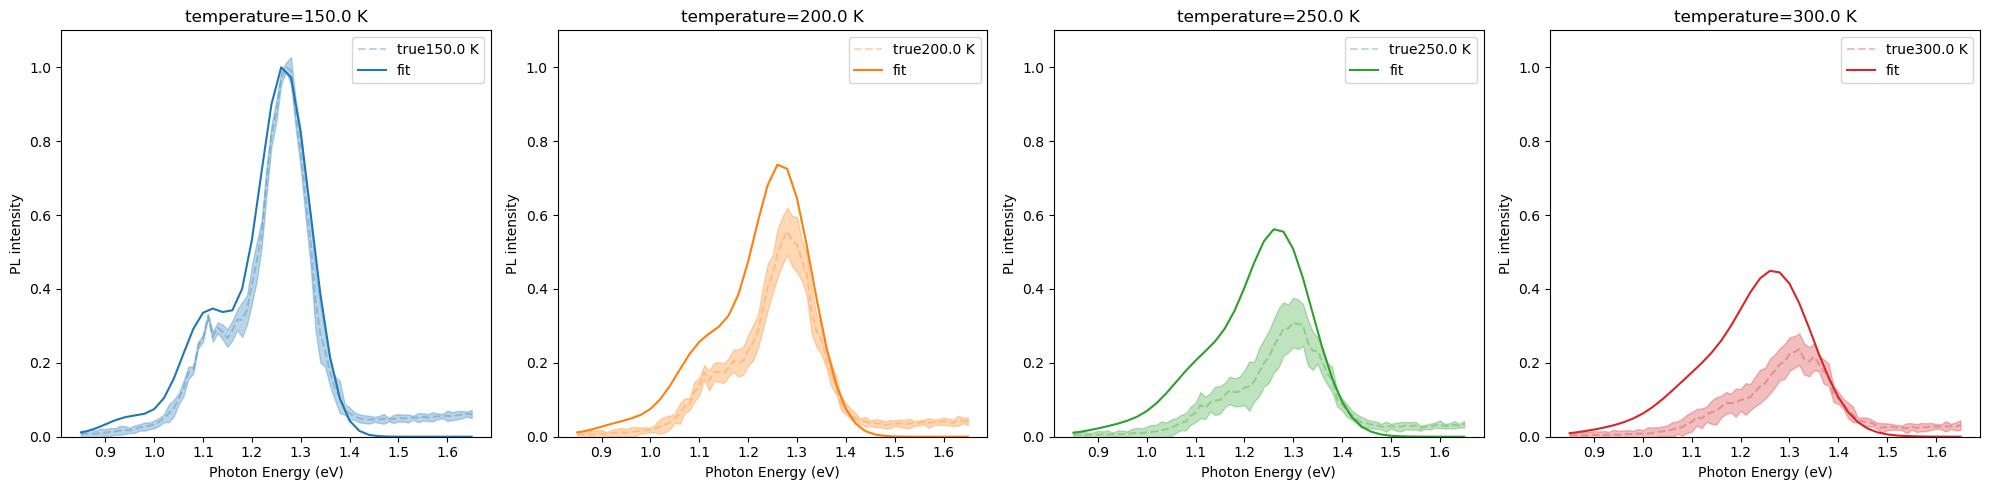

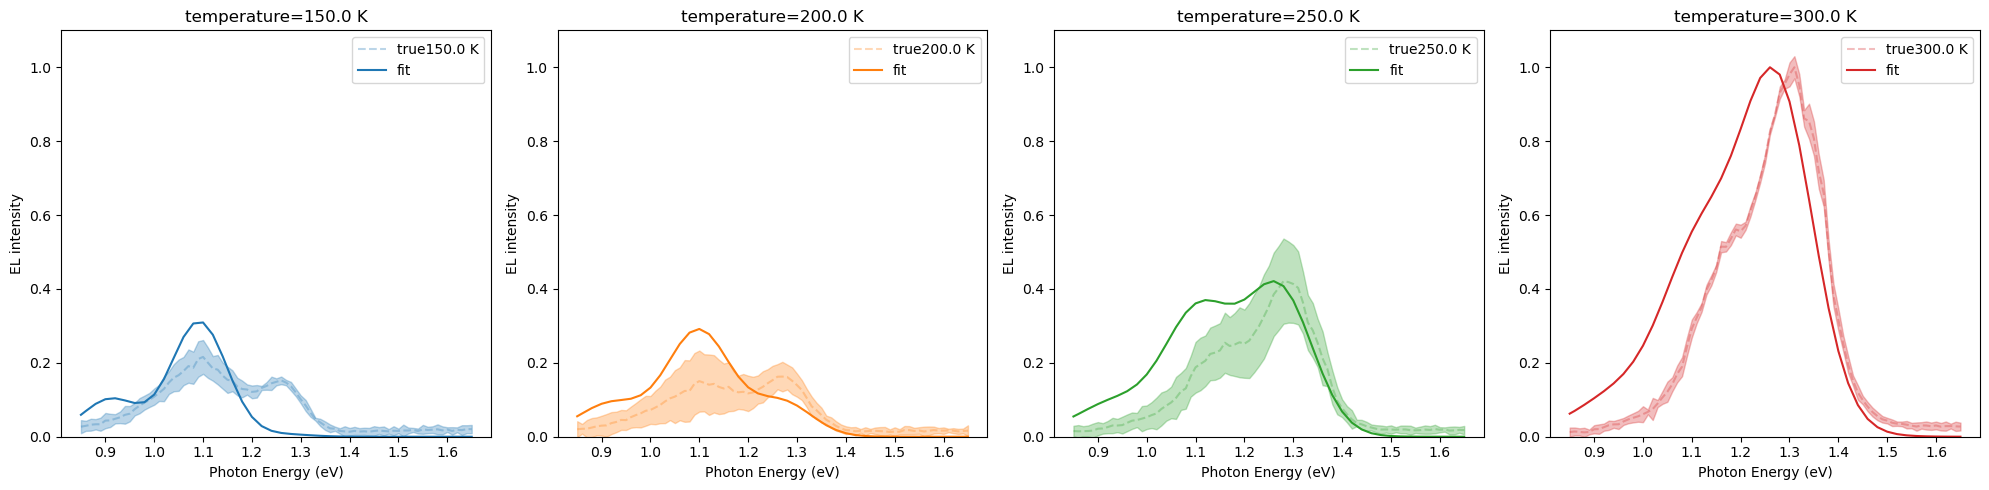

In [24]:
#load data and plot the relevant histograms

reader = fit_EL_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
print("Initial size: {0}".format(reader.iteration))
flat_samples = reader.get_log_prob(discard=2, thin=1, flat=True)
print(flat_samples.shape)
plt.hist(flat_samples[flat_samples>-1e4], 100, color="k", histtype="step")
plt.xlabel("log probability")
plt.ylabel("Number of samples")
plt.xlim(-2000,0)
plt.title(' log probability distribution')
plt.show()
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = reader.get_chain()
labels = ["E_CT", "K_EX_CT", "LI_CT", "L0_CT", "H0_CT","fosc_CT"]
ndim = len(labels)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
fig.show()
#flat_samples.shape
distribution = reader.get_chain(discard=5000, thin=5, flat=True)
true_parameters=list(np.mean(distribution,axis=0))
print(flat_samples.shape)
fig, axes = plt.subplots(6, figsize=(10, 7))
axes_xlim = [[1,2],[8,12],[0,0.2],[0,0.2],[0.1,0.2],[-3,0]]
for i in range(ndim):
    ax = axes[i]
    ax.hist(distribution[:, i], 200, color="k", histtype="step")
    #ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.set_xlim(axes_xlim[i])
    #ax.yaxis.set_label_coords(-0.1, 0.5)
fig.tight_layout()
fig.show()
# add noise to the data and plot it now with the fitted parameters
#plot posterior predictive
print(csv_name)
Exp_data_PL, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name)
Exp_data_EL, temperature_list_EL, hws_EL = Exp_data_utils.read_data(csv_name.replace('PL','EL'))
LE_params = [1.37,1e-03,7.87e-02,1.1e-01, 1.59e-01] 
true_parameters=list(np.mean(distribution,axis=0))
print(' true parameter mean' ,true_parameters)
model_data_EL, model_data_PL= fit_EL_exp_EMCEE.el_trial(list(true_parameters), temperature_list_EL, hws_EL,temperature_list_PL,hws_PL,LE_params)
model_data_EL = model_data_EL/np.max(model_data_EL.reshape(-1,1))
model_data_PL = model_data_PL/np.max(model_data_PL.reshape(-1,1))
co_var_mat_PL,co_var_mat_EL,variance_EL,variance_PL= fit_EL_exp_EMCEE.plot_generated_data(temperature_list_EL, hws_EL,temperature_list_PL,hws_PL, save_folder, model_config,LE_params, savefig=False,true_parameters=true_parameters)
fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_PL, temperature_list_PL, hws_PL, variance_PL, save_folder)
for ax in axis:
   ax.set_ylim(0, 1.1)
for i,axes  in enumerate(axis):
    axes.plot(hws_PL,model_data_PL[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
    axes.set_ylabel("PL intensity")
fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_EL, temperature_list_EL, hws_EL, variance_EL, save_folder)
for ax in axis:
    ax.set_ylim(0, 1.1)
for i,axes  in enumerate(axis):
    axes.plot(hws_EL,model_data_EL[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
    axes.set_ylabel("EL intensity")


In [ ]:
fig,axis = plt.subplots(1,4,figsize=(20,5))
for ax in axis:
    ax.set_ylim(0, 1.1)
for i,axes  in enumerate(axis):
    axes.plot(hws_EL,np.abs(model_data_EL[:,i]-Exp_data_EL[:,i]),label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
    axes.set_ylabel("EL intensity")

: 

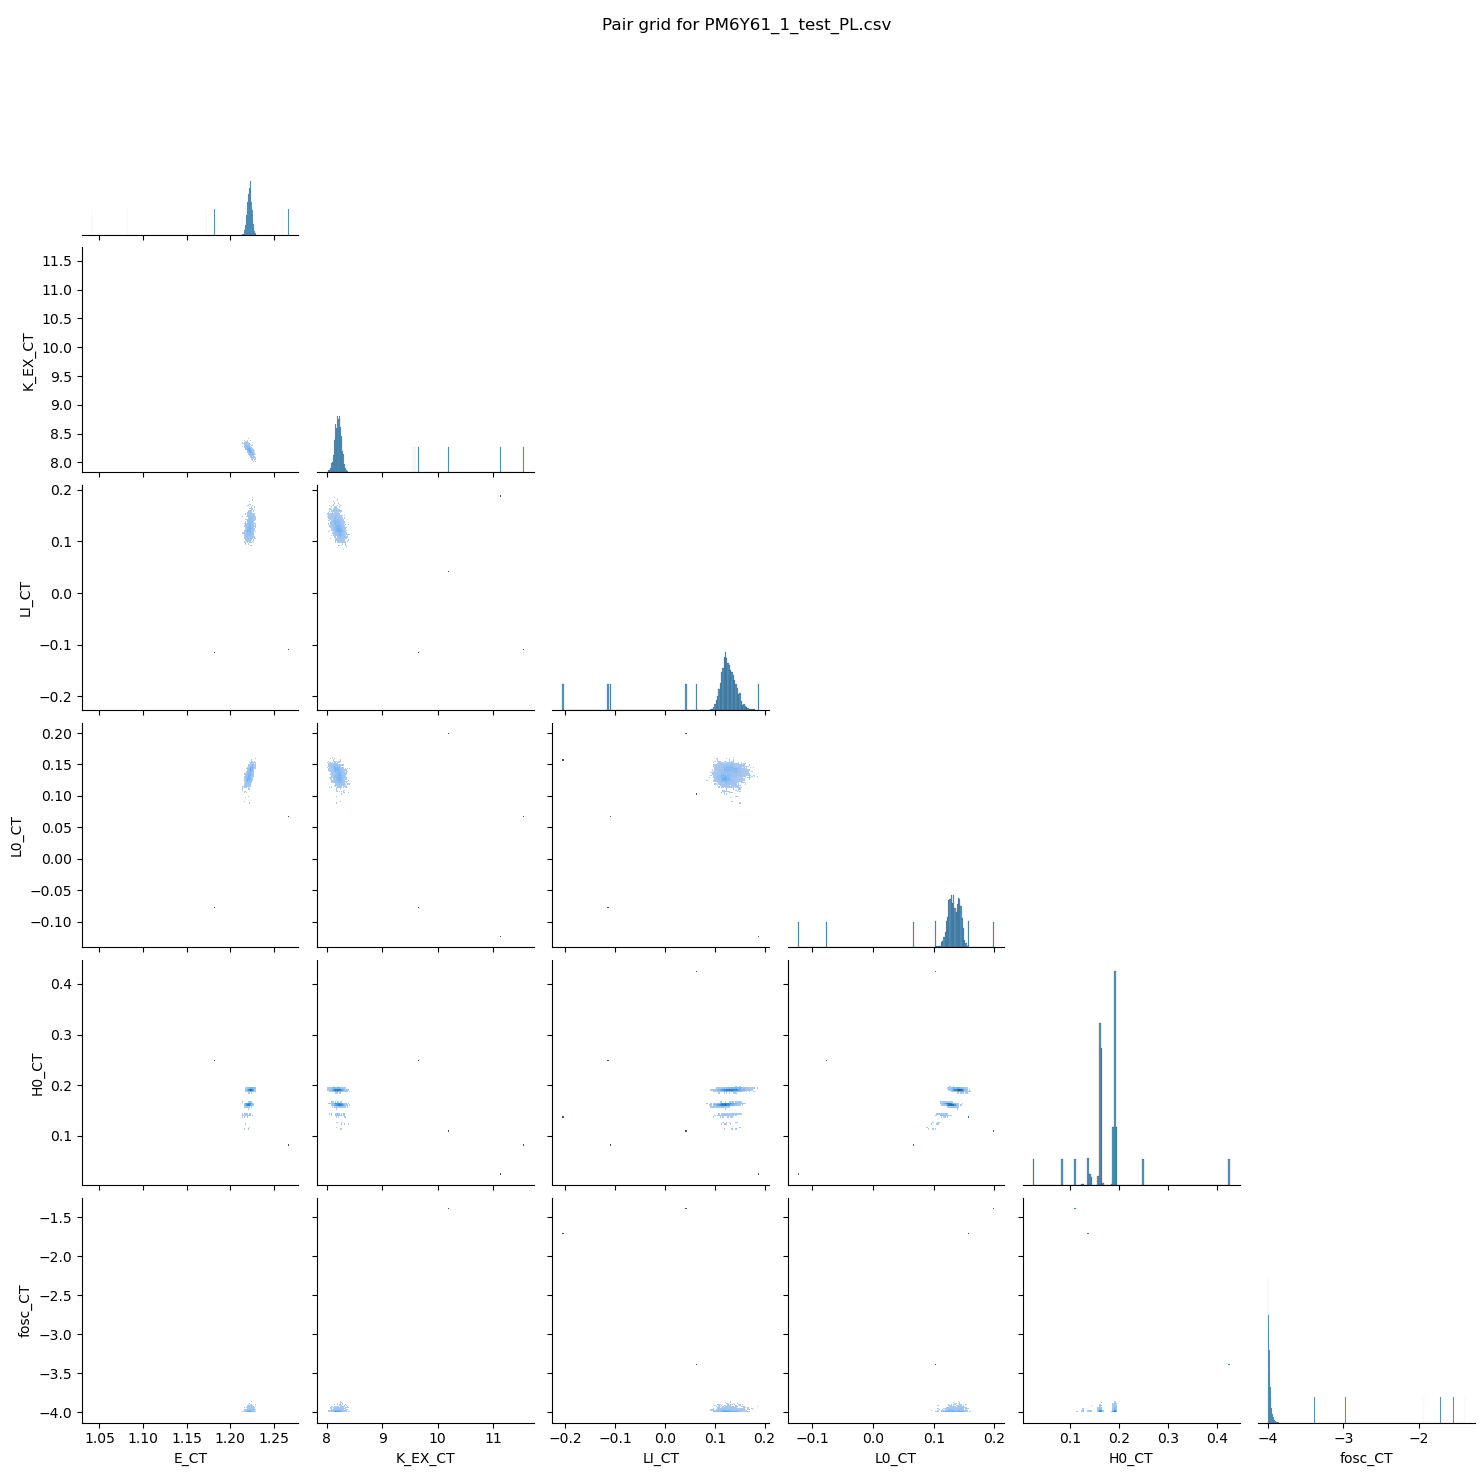

In [21]:
# plot a pair grid plot
import seaborn as sns
#plot posterior predictive


samples = reader.get_chain(discard=1000, thin=15, flat=True)
df_samples = pd.DataFrame(samples, columns=labels)
g = sns.pairplot(df_samples, kind="hist", corner=True)
#g = sns.PairGrid(df,diag_sharey=False, corner=True)
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.kdeplot)
g.figure.suptitle(f"Pair grid for {csv_name.split('/')[-1]}")
g.figure.show()
